In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from IPython.display import Audio,Image, YouTubeVideo

In [2]:
df = pd.read_csv('final_df3_eng.csv')

In [3]:
df.shape

(54592, 30)

In [78]:
df.nunique()

video_id                54235
channelId                 184
publishedAt             50227
description             46185
channelTitle              182
tags                    39254
categoryId                 15
liveBroadcastContent        2
duration                 5819
dimension                   2
definition                  2
caption                     2
projection                  2
licensedContent             2
viewCount               22233
likeCount                4228
dislikeCount              744
favoriteCount               1
commentCount             1241
new_dur                  5819
new_publishedAt         50227
pct_like                35734
title                   53669
channel_id                184
country                    20
customUrl                 164
subscriberCount           174
ch_viewCount              184
videoCount                165
publishedAt_channel       184
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54592 entries, 0 to 54591
Data columns (total 30 columns):
video_id                54592 non-null object
channelId               54592 non-null object
publishedAt             54592 non-null object
description             52824 non-null object
channelTitle            54592 non-null object
tags                    50938 non-null object
categoryId              54592 non-null int64
liveBroadcastContent    54592 non-null object
duration                54592 non-null object
dimension               54592 non-null object
definition              54592 non-null object
caption                 54592 non-null bool
projection              54592 non-null object
licensedContent         54592 non-null bool
viewCount               54576 non-null float64
likeCount               52641 non-null float64
dislikeCount            52641 non-null float64
favoriteCount           54592 non-null int64
commentCount            52156 non-null float64
new_dur            

### Exploratory Data Analysis

In [236]:
columns_vid = ['video_id', 'channelId', 'new_publishedAt', 'new_dur', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'title']
vid = df[columns_vid]
print(vid.shape)
vid.is_copy = False
vid.head(3)


(54592, 9)


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


,video_id,channelId,new_publishedAt,new_dur,viewCount,likeCount,dislikeCount,commentCount,title
0,K4N0e-JM2TU,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 06:21:49+00:00,0 days 00:09:32.000000000,0.0,39.0,1.0,9.0,5:00 AM - Current Affairs Questions 4 Nov 2019...
1,CQqx7-Eto48,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 10:45:49+00:00,0 days 00:06:24.000000000,0.0,26.0,0.0,0.0,7:45 AM - फटाफट English in 5 Minutes by Harsh ...
2,RODWoLxCSxU,UC4M6sKj8MkPO1zfq5ay3rLw,2019-04-03 02:24:09+00:00,0 days 00:17:48.000000000,1.0,1.0,0.0,0.0,CST 200 7C IPv6


In [237]:
vid.dropna(subset = ['viewCount', 'likeCount', 'dislikeCount', 'commentCount'], inplace = True)
vid.head(2)

,video_id,channelId,new_publishedAt,new_dur,viewCount,likeCount,dislikeCount,commentCount,title
0,K4N0e-JM2TU,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 06:21:49+00:00,0 days 00:09:32.000000000,0.0,39.0,1.0,9.0,5:00 AM - Current Affairs Questions 4 Nov 2019...
1,CQqx7-Eto48,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 10:45:49+00:00,0 days 00:06:24.000000000,0.0,26.0,0.0,0.0,7:45 AM - फटाफट English in 5 Minutes by Harsh ...


In [238]:
vid['likes_log'] = np.log(vid['likeCount'] + 1)
vid['views_log'] = np.log(vid['viewCount'] + 1)
vid['dislikes_log'] = np.log(vid['dislikeCount'] + 1)
vid['comment_log'] = np.log(vid['commentCount'] + 1)

In [239]:
vid.head(2)

,video_id,channelId,new_publishedAt,new_dur,viewCount,likeCount,dislikeCount,commentCount,title,likes_log,views_log,dislikes_log,comment_log
0,K4N0e-JM2TU,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 06:21:49+00:00,0 days 00:09:32.000000000,0.0,39.0,1.0,9.0,5:00 AM - Current Affairs Questions 4 Nov 2019...,3.688879,0.0,0.693147,2.302585
1,CQqx7-Eto48,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 10:45:49+00:00,0 days 00:06:24.000000000,0.0,26.0,0.0,0.0,7:45 AM - फटाफट English in 5 Minutes by Harsh ...,3.295837,0.0,0.000000,0.000000


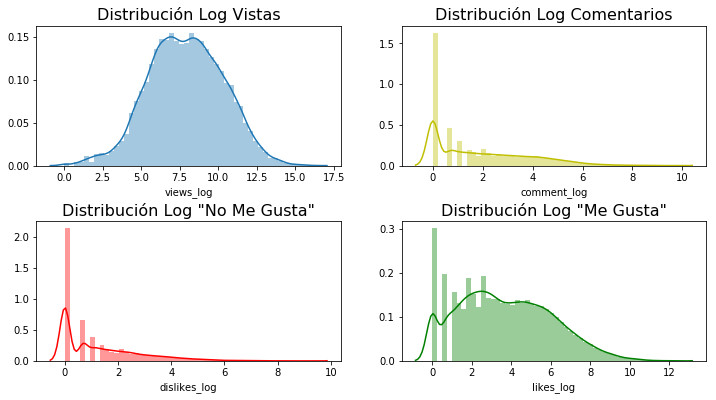

In [240]:
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(vid['views_log'])
g1.set_title('Distribución Log Vistas', fontsize = 16)

plt.subplot(224)
g2 = sns.distplot(vid['likes_log'], color = 'green')
g2.set_title('Distribución Log "Me Gusta"', fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(vid['dislikes_log'], color = 'r')
g3.set_title('Distribución Log "No Me Gusta"', fontsize = 16)

plt.subplot(222)
g4 = sns.distplot(vid['comment_log'], color = 'y')
g4.set_title('Distribución Log Comentarios', fontsize = 16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()

### Quantiles

In [241]:
vid[['viewCount', 'likeCount', 'dislikeCount', 'commentCount']].quantile(q=[0.01, 0.25, 0.5, 0.75, 0.99])

,viewCount,likeCount,dislikeCount,commentCount
0.01,6.0,0.0,0.0,0.0
0.25,490.5,6.0,0.0,0.0
0.50,2662.0,33.0,1.0,3.0
0.75,15395.0,226.0,8.0,27.0
0.99,582933.1,10778.0,349.9,929.9


### Engagement Features

In [242]:
vid['like_rate'] = vid['likeCount'] / vid['viewCount'] * 100
vid['dislike_rate'] = vid['dislikeCount'] / vid['viewCount'] * 100
vid['comment_rate'] = vid['commentCount'] / vid['viewCount'] * 100

In [243]:
vid.head(2)

,video_id,channelId,new_publishedAt,new_dur,viewCount,likeCount,dislikeCount,commentCount,title,likes_log,views_log,dislikes_log,comment_log,like_rate,dislike_rate,comment_rate
0,K4N0e-JM2TU,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 06:21:49+00:00,0 days 00:09:32.000000000,0.0,39.0,1.0,9.0,5:00 AM - Current Affairs Questions 4 Nov 2019...,3.688879,0.0,0.693147,2.302585,inf,inf,inf
1,CQqx7-Eto48,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 10:45:49+00:00,0 days 00:06:24.000000000,0.0,26.0,0.0,0.0,7:45 AM - फटाफट English in 5 Minutes by Harsh ...,3.295837,0.0,0.000000,0.000000,inf,NaN,NaN


C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


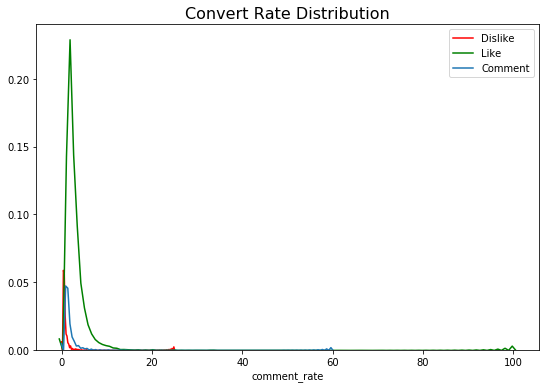

In [244]:
plt.figure(figsize = (9, 6))

g1 = sns.distplot(vid['dislike_rate'], color = 'red', hist = False, label = 'Dislike')
g1 = sns.distplot(vid['like_rate'], color = 'green', hist = False, label = 'Like')
g1 = sns.distplot(vid['comment_rate'], hist = False, label = 'Comment')
g1.set_title('Convert Rate Distribution', fontsize = 16)

plt.legend()
plt.show()

### Analysing the Correlation Matrix of the numerical variables

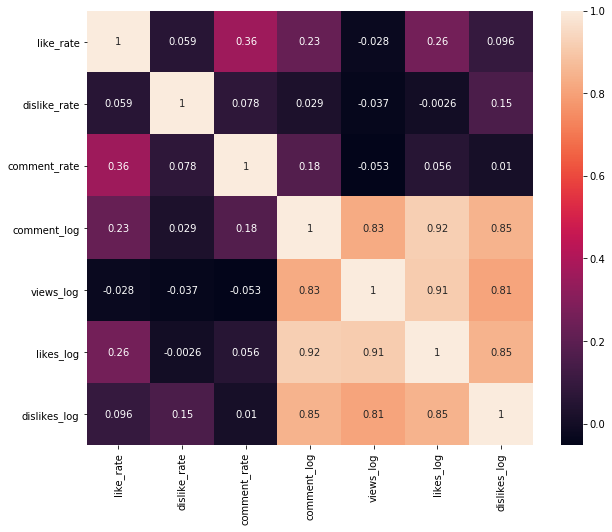

In [245]:
plt.figure(figsize = (10, 8))

cols = ['like_rate', 'dislike_rate', 'comment_rate', 'comment_log', 'views_log', 'likes_log', 'dislikes_log']
sns.heatmap(vid[cols].corr(), annot = True)
plt.show()

### Analyzing some Text Data

In [246]:
columns = ['title', 'tags']
text = df[columns]
text.head(5)

,title,tags
0,5:00 AM - Current Affairs Questions 4 Nov 2019...,NaN
1,7:45 AM - फटाफट English in 5 Minutes by Harsh ...,NaN
2,CST 200 7C IPv6,NaN
3,389 9 43 DatacenterHardware,NaN
4,Julia Lang vs. Python | Lernen am Beispiel | c...,"['Julia Lang', 'Python', 'Lernen am Beispiel']"


### Create LDC (Likes, Dislikes, Comments) Score based on Quantiles

In [247]:
vid['like_rate_rank'] = pd.qcut(vid['like_rate'], 5, labels = False)
vid['dislike_rate_rank'] = pd.qcut(vid['dislike_rate'], 5, labels = False, duplicates = 'drop')
vid['comment_rate_rank'] = pd.qcut(vid['comment_rate'], 5, labels = False, duplicates = 'drop')

vid['LDC_Score'] = vid['like_rate_rank'] + vid['comment_rate_rank'] - vid['dislike_rate_rank']

### Get Channel Info

In [248]:
columns_ch = ['channelId', 'subscriberCount', 'videoCount']
ch = df[columns_ch].drop_duplicates().reset_index(drop = True)
ch['ch_avg_subs'] = ch['subscriberCount'] / ch['videoCount']
print(ch.shape)
ch.head(5)

(184, 4)


,channelId,subscriberCount,videoCount,ch_avg_subs
0,UCuWuAvEnKWez5BUr29VpwqA,10000000,14982,667.467628
1,UC4M6sKj8MkPO1zfq5ay3rLw,4900,356,13.764045
2,UCVJGR7M8f9rVbOC7KNRA9GQ,115,323,0.356037
3,UCqd6TofKNjqagInm5Waeu7w,33500,329,101.823708
4,UCzDDzgwtrEYfIlv0VlrBu0Q,28200,1119,25.201072


### Summarize main metrics

In [249]:
df['n_video'] = 1
summ_channels = df.groupby('channelId')[['likeCount', 'dislikeCount', 'commentCount', 'viewCount', 'n_video']].agg('sum')
summ_channels.reset_index(drop = False, inplace = True)
print(summ_channels.shape)
summ_channels.head(3)

(184, 6)


,channelId,likeCount,dislikeCount,commentCount,viewCount,n_video
0,UC0OVMkuUaYqm6TmQWOSJcrQ,3714.0,536.0,384.0,2413627.0,338
1,UC0e3QhIYukixgh5VVpKHH9Q,2642605.0,76864.0,176286.0,101207447.0,39
2,UC0tRdbXVDbhaRvZPKsRgmxg,55920.0,1764.0,7644.0,1549077.0,93


### Engagement Features by Channel

In [250]:
summ_channels['ch_like_rate'] = summ_channels['likeCount'] / summ_channels['viewCount'] * 100
summ_channels['ch_dislike_rate'] = summ_channels['dislikeCount'] / summ_channels['viewCount'] * 100
summ_channels['ch_comment_rate'] = summ_channels['commentCount'] / summ_channels['viewCount'] * 100
summ_channels['ch_avg_views'] = summ_channels['viewCount'] / summ_channels['n_video']
summ_channels.head(5)

,channelId,likeCount,dislikeCount,commentCount,viewCount,n_video,ch_like_rate,ch_dislike_rate,ch_comment_rate,ch_avg_views
0,UC0OVMkuUaYqm6TmQWOSJcrQ,3714.0,536.0,384.0,2413627.0,338,0.153876,0.022207,0.015910,7.140908e+03
1,UC0e3QhIYukixgh5VVpKHH9Q,2642605.0,76864.0,176286.0,101207447.0,39,2.611078,0.075947,0.174183,2.595063e+06
2,UC0tRdbXVDbhaRvZPKsRgmxg,55920.0,1764.0,7644.0,1549077.0,93,3.609892,0.113874,0.493455,1.665674e+04
3,UC0z_jCi0XWqI8awUuQRFnyw,16195.0,406.0,1102.0,3253262.0,69,0.497808,0.012480,0.033874,4.714872e+04
4,UC1HNbJWau3JhauN4qb6BGLw,68.0,12.0,1.0,46025.0,7,0.147746,0.026073,0.002173,6.575000e+03


In [251]:
channels_info = summ_channels.merge(right = ch[['channelId', 'ch_avg_subs']], how = 'left')
channels_info.drop(columns = ['likeCount', 'dislikeCount', 'commentCount', 'viewCount', 'n_video'], inplace = True)
channels_info.head(3)

,channelId,ch_like_rate,ch_dislike_rate,ch_comment_rate,ch_avg_views,ch_avg_subs
0,UC0OVMkuUaYqm6TmQWOSJcrQ,0.153876,0.022207,0.015910,7.140908e+03,15.680473
1,UC0e3QhIYukixgh5VVpKHH9Q,2.611078,0.075947,0.174183,2.595063e+06,42307.692308
2,UC0tRdbXVDbhaRvZPKsRgmxg,3.609892,0.113874,0.493455,1.665674e+04,444.086022


### Quantiles

In [253]:
channels_info['ch_like_rate_rank'] = pd.qcut(channels_info['ch_like_rate'], 5, labels = False, duplicates = 'drop')
channels_info['ch_dislike_rate_rank'] = pd.qcut(channels_info['ch_dislike_rate'], 5, labels = False, duplicates = 'drop')
channels_info['ch_comment_rate_rank'] = pd.qcut(channels_info['ch_comment_rate'], 5, labels = False, duplicates = 'drop')
channels_info['ch_avg_views_rank'] = pd.qcut(channels_info['ch_avg_views'], 5, labels = False, duplicates = 'drop')
channels_info['ch_avg_subs_rank'] = pd.qcut(channels_info['ch_avg_subs'], 5, labels = False, duplicates = 'drop')

channels_info['ch_LDC_Score'] = channels_info['ch_like_rate_rank'] + channels_info['ch_comment_rate_rank'] - channels_info['ch_dislike_rate_rank'] + channels_info['ch_avg_views_rank'] + channels_info['ch_avg_subs_rank']
channels_info.head(3)

,channelId,ch_like_rate,ch_dislike_rate,ch_comment_rate,ch_avg_views,ch_avg_subs,ch_like_rate_rank,ch_dislike_rate_rank,ch_comment_rate_rank,ch_avg_views_rank,ch_avg_subs_rank,ch_LDC_Score
0,UC0OVMkuUaYqm6TmQWOSJcrQ,0.153876,0.022207,0.015910,7.140908e+03,15.680473,0,0,0,2,0,2
1,UC0e3QhIYukixgh5VVpKHH9Q,2.611078,0.075947,0.174183,2.595063e+06,42307.692308,4,3,3,4,4,12
2,UC0tRdbXVDbhaRvZPKsRgmxg,3.609892,0.113874,0.493455,1.665674e+04,444.086022,4,4,4,2,3,9


In [254]:
vid_score = vid.merge(right = channels_info[['channelId', 'ch_LDC_Score']], how = 'left')
vid_score.head(3)

,video_id,channelId,new_publishedAt,new_dur,viewCount,likeCount,dislikeCount,commentCount,title,likes_log,...,dislikes_log,comment_log,like_rate,dislike_rate,comment_rate,like_rate_rank,dislike_rate_rank,comment_rate_rank,LDC_Score,ch_LDC_Score
0,K4N0e-JM2TU,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 06:21:49+00:00,0 days 00:09:32.000000000,0.0,39.0,1.0,9.0,5:00 AM - Current Affairs Questions 4 Nov 2019...,3.688879,...,0.693147,2.302585,inf,inf,inf,4.0,3.0,3.0,4.0,11
1,CQqx7-Eto48,UCuWuAvEnKWez5BUr29VpwqA,2019-11-02 10:45:49+00:00,0 days 00:06:24.000000000,0.0,26.0,0.0,0.0,7:45 AM - फटाफट English in 5 Minutes by Harsh ...,3.295837,...,0.000000,0.000000,inf,NaN,NaN,4.0,NaN,NaN,NaN,11
2,RODWoLxCSxU,UC4M6sKj8MkPO1zfq5ay3rLw,2019-04-03 02:24:09+00:00,0 days 00:17:48.000000000,1.0,1.0,0.0,0.0,CST 200 7C IPv6,0.693147,...,0.000000,0.000000,100.0,0.0,0.0,4.0,0.0,0.0,4.0,3


In [339]:
found_videos = vid_score['title'].str.contains('neural networks', flags = re.IGNORECASE, regex = True)

In [340]:
return_df = vid_score[found_videos]
return_df.is_copy = False
return_df.head(3)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


,video_id,channelId,new_publishedAt,new_dur,viewCount,likeCount,dislikeCount,commentCount,title,likes_log,...,dislikes_log,comment_log,like_rate,dislike_rate,comment_rate,like_rate_rank,dislike_rate_rank,comment_rate_rank,LDC_Score,ch_LDC_Score
694,B7VmgPhev4o,UCGByJSZBR_kcr4Qid4_iB3Q,2019-03-11 07:05:29+00:00,0 days 00:07:31.000000000,113.0,10.0,0.0,0.0,Imarticus Learning - Neural Networks,2.397895,...,0.000000,0.000000,8.849558,0.000000,0.000000,4.0,0.0,0.0,4.0,1
965,YFL-MI5xzgg,UCbfYPyITQ-7l4upoX8nvctg,2019-03-05 16:59:58+00:00,0 days 00:05:14.000000000,41178.0,3235.0,15.0,199.0,Do Neural Networks Need To Think Like Humans?,8.082093,...,2.772589,5.298317,7.856137,0.036427,0.483268,4.0,1.0,3.0,6.0,12
2213,AOZw1tgD8dA,UCbfYPyITQ-7l4upoX8nvctg,2019-09-10 16:02:05+00:00,0 days 00:04:57.000000000,58839.0,3376.0,37.0,172.0,Adversarial Attacks on Neural Networks - Bug o...,8.124743,...,3.637586,5.153292,5.737691,0.062883,0.292323,4.0,2.0,2.0,4.0,12


In [341]:
crossed_table = pd.pivot_table(return_df, values = 'video_id', index = 'LDC_Score', columns = 'ch_LDC_Score', aggfunc = 'count')
crossed_table

ch_LDC_Score,1,2,4,5,6,7,10,11,12,13
LDC_Score,,,,,,,,,,
-1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
0.0,4.0,2.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN
1.0,4.0,2.0,2.0,2.0,1.0,1.0,NaN,3.0,3.0,NaN
2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,8.0,4.0,NaN
3.0,NaN,3.0,NaN,1.0,3.0,2.0,2.0,8.0,9.0,NaN
4.0,1.0,NaN,NaN,3.0,1.0,2.0,1.0,12.0,22.0,1.0
5.0,3.0,NaN,NaN,3.0,3.0,1.0,3.0,6.0,8.0,NaN
6.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN


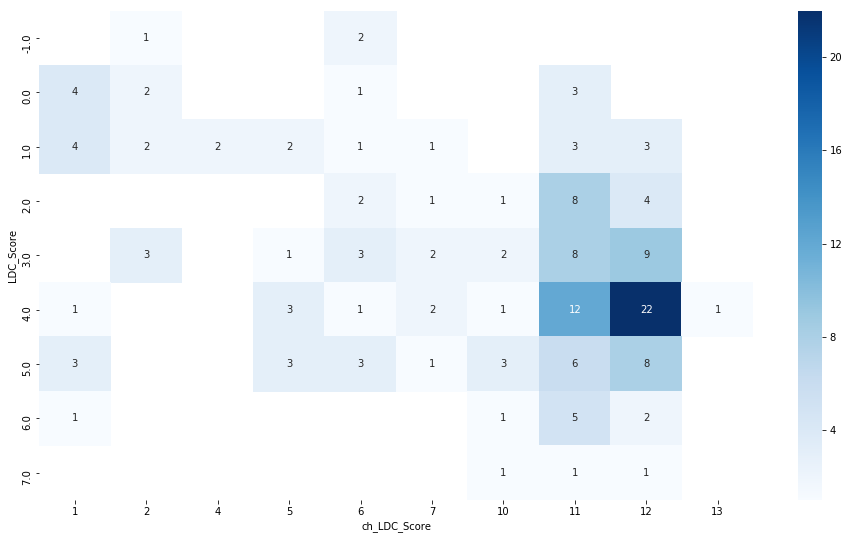

In [342]:
plt.figure(figsize = (16, 9))
sns.heatmap(crossed_table, cmap = 'Blues', annot = True)
plt.show()

In [343]:
return_df['Score'] = return_df['LDC_Score'] + return_df['ch_LDC_Score']
return_df.sort_values(by = ['Score'], inplace = True, ascending = False)
cols = ['video_id', 'title', 'Score']
top_5 = return_df[cols].head(5).reset_index(drop=True)
top_5

,video_id,title,Score
0,LqGTFqPEXWs,Jeremy Howard: Very Fast Training of Neural Ne...,19.0
1,H8wKE4YDB_E,Machine Learning Tutorial - What do neural net...,18.0
2,LhhEv1dMpKE,Training Deep Neural Networks With Dropout | T...,18.0
3,YFL-MI5xzgg,Do Neural Networks Need To Think Like Humans?,18.0
4,3yOZxmlBG3Y,Pruning Makes Faster and Smaller Neural Networ...,17.0


In [408]:
def get_top5_best_videos(subject, top_video_num):
    
    lookup_string = subject

    found_videos = vid_score['title'].str.contains(lookup_string, flags = re.IGNORECASE, regex = True)

    return_df = vid_score[found_videos]

    return_df['Score'] = return_df['LDC_Score'] + return_df['ch_LDC_Score']
    return_df.sort_values(by = ['Score'], inplace = True, ascending = False)
    cols = ['video_id', 'title', 'Score']
    top_5 = return_df[cols].head(5).reset_index(drop=True)
    print(top_5)

    id=top_5['video_id'][top_video_num]

    
    return id

      video_id                                              title  Score
0  9TiezQ7Gb3M                            How Decision Trees Work   13.0
1  0Xc9LIb_HTw  Decision Trees and Boosting, XGBoost | Two Min...   11.0
2  FhymzoDy3WU  What is decision trees and how does decision t...    9.0
3  ayFGQCVYQyI  LIVE on Sept 8th 2019: Dive deep into SVM and ...    9.0
4  cLpIh8Aiy2w  Fast Gradient Boosting Decision Trees with PyG...    7.0


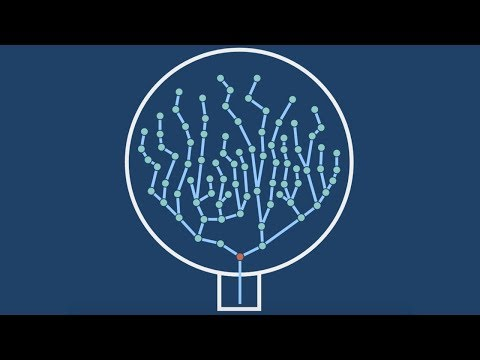

In [409]:
YouTubeVideo(id=get_top5_best_videos(subject = 'decision trees', top_video_num = 0),width=600,height=300)

      video_id                                              title  Score
0  _cXuvTQl090  3.3: Linear Regression with Ordinary Least Squ...   16.0
1  dLp10CFIvxI  Coding Challenge #104: Linear Regression with ...   16.0
2  XdM6ER7zTLk  How to Do Linear Regression using Gradient Des...   15.0
3  Rrpk-fTG5Dw                         What is Linear Regression?   15.0
4  L-Lsfu4ab74  3.4: Linear Regression with Gradient Descent -...   15.0


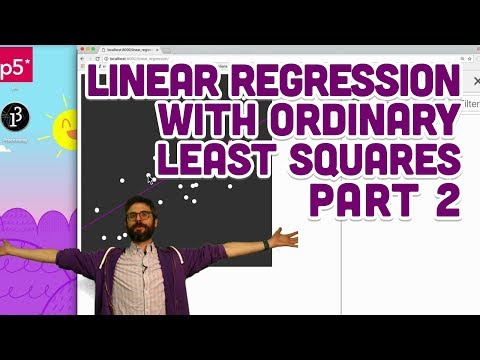

In [407]:
YouTubeVideo(id=get_top5_best_videos(subject = 'linear regression', top_video_num = 0),width=600,height=300)

      video_id                                              title  Score
0  Vah_RQrlM_k  Tutorial 12- Python Functions, Positional and ...   16.0
1  u-OmVr_fT4s  Python Functions | Python Tutorial for Absolut...   16.0
2  NE97ylAnrz4  Python Functions  ||  Python Tutorial  ||  Lea...   12.0
3  WkC7ktXM_8k  Python Functions | Functions in Python | Pytho...   11.0
4  EHzKEh74sJI  Python Tutorial for Beginners 21 - Python Func...   10.0


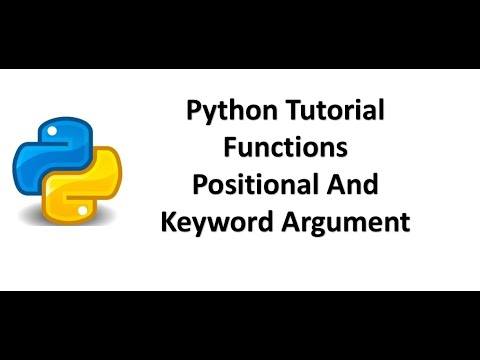

In [406]:
YouTubeVideo(id=get_top5_best_videos(subject = 'python functions', top_video_num = 0),width=600,height=300)